<a href="https://colab.research.google.com/github/Yi-Lai-SJSU/AWS_GreenGrass/blob/master/Copy_of_cmpe257_lab1_kaggle_data_0227_fine_tuning_efficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Feb 27 21:52:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    36W / 250W |    813MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [129]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [130]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [0]:
root_path = 'gdrive/My Drive/Colab Notebooks/cifar100/'  #change dir to your project folder

In [0]:
import pandas as pd

In [0]:
df_images = pd.read_csv(root_path + 'CIFAR_train_images.csv')  

In [135]:
df_images.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,231,176,237,255,255,255,255,255,252,242,229,195,212,182,255,254,254,254,254,254,254,254,...,81,58,45,26,2,3,56,87,41,39,56,43,30,62,81,49,66,65,90,102,89,75,65,50,48,64,67,68,48,25,43,74,76,47,47,24,4,10,59,79
1,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,252,253,253,253,253,253,253,253,253,253,253,253,253,253,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,253,253,253,253,253,253,253,253,252,253,253,253,253,253,253,252,253,253,253,253,253,253,253,253,253,253,253,253,253,253,255
2,250,248,247,248,249,249,248,248,247,247,247,246,245,245,246,246,246,244,242,244,247,248,247,247,246,247,249,250,250,250,250,249,250,248,247,249,250,250,250,249,...,151,148,147,147,148,151,180,228,226,224,225,224,224,223,220,215,210,208,207,208,209,209,207,206,206,205,204,202,198,197,197,196,193,191,190,189,190,194,207,228
3,124,131,135,138,140,144,148,152,156,158,160,161,165,172,175,177,185,188,193,198,199,195,188,177,169,167,166,165,158,149,143,136,121,128,134,140,144,149,156,159,...,222,222,223,224,217,221,233,230,25,23,29,39,38,33,23,23,28,78,181,208,202,199,208,212,215,212,210,208,196,190,198,206,215,216,217,221,223,232,236,231
4,43,32,87,127,55,48,51,87,121,113,135,126,119,122,153,155,147,175,201,162,143,188,137,94,114,87,103,70,75,74,43,39,44,38,59,136,90,50,49,63,...,63,45,69,34,73,54,36,32,57,47,67,43,39,37,36,44,32,18,52,37,27,50,86,97,78,59,37,63,109,81,38,63,70,54,76,50,78,60,29,37


In [0]:
df_labels = pd.read_csv(root_path + 'CIFAR_train_labels.csv')  

In [137]:
df_labels.head()

,0
0,19
1,29
2,0
3,11
4,1


In [0]:
def load_data_cifar100(image_path, label_path):
    images = pd.read_csv(image_path).to_numpy().reshape(-1,3,32,32).transpose(0,2,3,1)
    labels = pd.read_csv(label_path)
    return images, labels

In [0]:
images, labels = load_data_cifar100(image_path = root_path + 'CIFAR_train_images.csv',
                                    label_path = root_path + 'CIFAR_train_labels.csv')

In [140]:
print(images.shape)
print(labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [0]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
train_images, test_images,  train_labels, test_labels   = train_test_split(images,       labels,       test_size = 0.1)
train_images, valid_images, train_labels, valid_labels  = train_test_split(train_images, train_labels, test_size = 0.1)

In [142]:
print(train_images.shape)
print(valid_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(valid_labels.shape)
print(test_labels.shape)

(40500, 32, 32, 3)
(4500, 32, 32, 3)
(5000, 32, 32, 3)
(40500, 1)
(4500, 1)
(5000, 1)


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [0]:
train_datagen.fit(train_images)
valid_images = valid_images/255.0
test_images  = test_images/255.0

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(100, activation='sigmoid')
])

In [209]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=256),
                    steps_per_epoch=len(train_images)/256, 
                    epochs=150,
                    validation_data=(valid_images, valid_labels))

  ...
    to  
  ['...']
Train for 158.203125 steps, validate on 4500 samples
Epoch 1/150
159/158 [==============================] - 21s 131ms/step - loss: 2.9747 - accuracy: 0.2550 - val_loss: 2.8082 - val_accuracy: 0.2871
Epoch 2/150
159/158 [==============================] - 20s 126ms/step - loss: 2.8891 - accuracy: 0.2737 - val_loss: 2.7763 - val_accuracy: 0.2911
Epoch 3/150
159/158 [==============================] - 20s 127ms/step - loss: 2.8200 - accuracy: 0.2888 - val_loss: 2.6958 - val_accuracy: 0.3084
Epoch 4/150
159/158 [==============================] - 20s 124ms/step - loss: 2.7834 - accuracy: 0.2964 - val_loss: 2.6974 - val_accuracy: 0.3218
Epoch 5/150
159/158 [==============================] - 20s 127ms/step - loss: 2.7225 - accuracy: 0.3047 - val_loss: 2.6747 - val_accuracy: 0.3149
Epoch 6/150
159/158 [==============================] - 20s 128ms/step - loss: 2.6722 - accuracy: 0.3148 - val_loss: 2.5597 - val_accuracy: 0.3438
Epoch 7/150
159/158 [=========================

In [210]:
score = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.9567777784347533 / Test accuracy: 0.5013999938964844


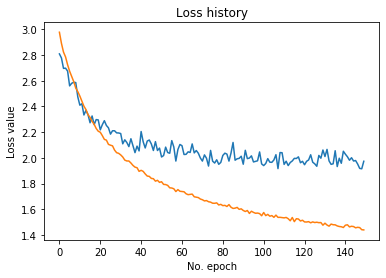

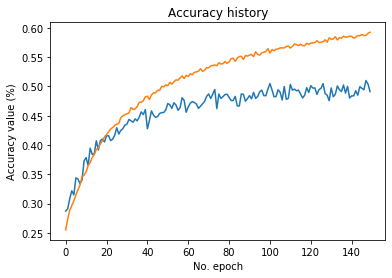

In [212]:
# https://blog.csdn.net/nima1994/article/details/79947407
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [0]:
model.save(root_path+"model-6-256.h5")

In [214]:
new_model = models.load_model(root_path+"model-6-256.h5")
new_model.summary()
loss, acc = new_model.evaluate(test_images, test_labels, verbose=0)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)         

In [0]:
df_predict_images = pd.read_csv(root_path + 'CIFAR_test_images.csv')

In [216]:
df_predict_images.drop(['index'], axis=1, inplace=True)
df_predict_images.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,199,196,195,195,196,197,198,198,199,201,203,205,206,207,208,209,209,209,210,210,211,211,211,211,211,212,213,215,215,216,217,224,197,195,195,196,197,200,202,202,...,156,185,200,220,230,220,192,149,118,123,127,124,115,123,129,129,137,143,141,135,144,152,160,166,156,140,152,159,176,201,197,167,154,172,183,209,217,215,211,183
1,113,88,72,63,72,100,131,149,139,132,115,108,97,56,65,78,79,80,128,141,110,94,121,160,139,77,29,30,88,105,86,63,95,78,62,62,73,98,129,147,...,101,98,100,95,79,84,77,64,135,137,141,152,183,180,188,183,129,127,119,106,94,88,107,107,105,107,117,109,99,93,90,87,88,89,94,102,104,96,80,67
2,61,61,67,62,64,63,70,73,78,88,85,76,72,76,88,95,97,90,85,77,82,89,92,90,84,77,72,76,76,70,64,64,67,78,80,64,66,67,65,59,...,187,156,167,185,148,152,142,149,47,35,37,33,34,32,50,46,33,32,42,61,33,38,51,65,57,42,74,78,62,126,180,200,181,173,206,201,172,189,115,89
3,93,88,104,90,74,70,70,75,77,60,61,79,75,64,44,40,46,65,82,65,46,59,68,60,58,38,28,28,103,185,188,198,87,61,54,84,96,87,98,113,...,120,118,111,111,120,135,163,213,248,219,187,173,172,173,173,171,172,169,169,169,165,165,170,169,167,167,167,166,166,170,170,168,168,168,163,160,163,173,191,223
4,80,80,82,86,92,97,96,97,98,99,100,102,104,105,106,110,113,111,111,111,112,110,105,102,100,98,97,94,90,89,86,83,86,88,89,92,98,103,104,105,...,41,40,38,37,36,34,32,30,32,34,35,36,38,38,36,38,38,39,40,40,37,36,37,40,40,39,40,40,39,37,36,37,38,39,38,37,35,34,32,29


In [217]:
df_predict_images.shape

(10000, 3072)

In [0]:
predict_images = df_predict_images.to_numpy().reshape(-1,3,32,32).transpose(0,2,3,1)

In [219]:
predict_images.shape

(10000, 32, 32, 3)

In [0]:
predict_images = predict_images/255.0

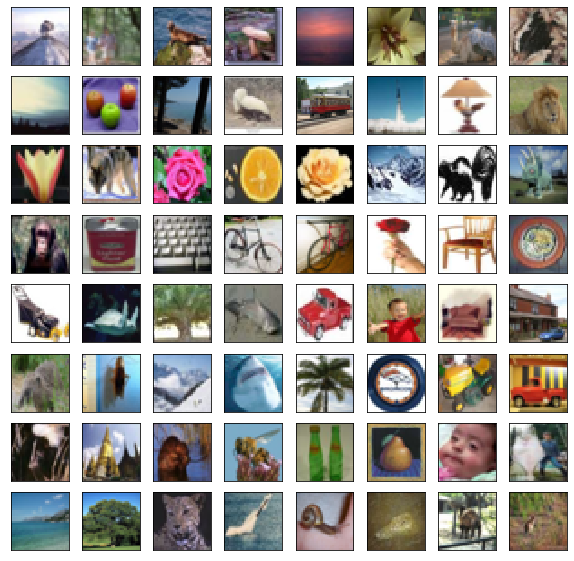

In [221]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predict_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
plt.show()

In [0]:
predict_result = model.predict(predict_images)

In [223]:
df_predict_result = pd.DataFrame(data=predict_result)
df_predict_result.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.049203e-02,6.350782e-03,1.066224e-02,8.472426e-03,1.429597e-02,4.783649e-03,1.371891e-02,1.044019e-02,7.531782e-03,4.669697e-03,9.126703e-03,1.162694e-02,4.848687e-03,8.111849e-03,1.131744e-02,4.148346e-03,5.282970e-03,5.699870e-03,6.233048e-03,4.709296e-03,7.428383e-03,1.074305e-02,8.350130e-03,1.000256e-02,6.841210e-03,4.380997e-03,1.064048e-02,9.555136e-03,5.834247e-03,6.252669e-03,9.259243e-03,7.393231e-03,6.754643e-03,1.063027e-02,6.430956e-03,1.416995e-02,5.479386e-03,7.515050e-03,5.695954e-03,7.686452e-03,...,8.622091e-03,1.168404e-02,1.112860e-02,1.324342e-02,9.622280e-03,5.005298e-03,9.990297e-03,7.637623e-03,7.798039e-03,5.765006e-03,1.216873e-02,6.141433e-03,7.710738e-03,1.069139e-02,1.862783e-02,5.897260e-03,6.005415e-03,7.970390e-03,1.878832e-02,8.171683e-03,8.534926e-03,1.200616e-02,1.067274e-02,6.811201e-03,6.022786e-03,6.543014e-03,6.051685e-03,6.030499e-03,1.205897e-02,1.024562e-02,8.143180e-03,7.664668e-03,1.245709e-02,1.130499e-02,9.032579e-03,6.159790e-03,1.250587e-02,1.022471e-02,1.103609e-02,9.628327e-03
std,8.704491e-02,5.013289e-02,6.473778e-02,4.439267e-02,5.288468e-02,4.342769e-02,7.260148e-02,6.748431e-02,6.115356e-02,5.489309e-02,5.363855e-02,6.792121e-02,4.178644e-02,5.647158e-02,6.067897e-02,2.956766e-02,4.582382e-02,5.856200e-02,3.931228e-02,3.166012e-02,7.779385e-02,7.147124e-02,6.081764e-02,7.979185e-02,6.455988e-02,3.157137e-02,4.136642e-02,4.080947e-02,6.082061e-02,4.049405e-02,6.215358e-02,5.378506e-02,4.364548e-02,5.326226e-02,3.710808e-02,7.924882e-02,4.159534e-02,5.048827e-02,2.771152e-02,6.518255e-02,...,7.951718e-02,8.774538e-02,8.030698e-02,6.340414e-02,4.007073e-02,2.421380e-02,5.320968e-02,5.187723e-02,7.987312e-02,5.971966e-02,8.467180e-02,5.948663e-02,2.758001e-02,7.062446e-02,6.839053e-02,5.415023e-02,6.265582e-02,3.761760e-02,7.414423e-02,4.878070e-02,3.209835e-02,8.117611e-02,8.837409e-02,4.958478e-02,4.342066e-02,4.947557e-02,5.209084e-02,5.434620e-02,7.080776e-02,6.449161e-02,5.935967e-02,5.963023e-02,7.239806e-02,4.358633e-02,8.061497e-02,4.711136e-02,6.814291e-02,5.389111e-02,6.346482e-02,5.742032e-02
min,0.000000e+00,6.180670e-37,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.974801e-33,3.052273e-38,0.000000e+00,9.292440e-32,6.268956e-37,0.000000e+00,0.000000e+00,0.000000e+00,3.616893e-35,1.180318e-36,4.157644e-32,0.000000e+00,0.000000e+00,3.639325e-36,0.000000e+00,0.000000e+00,1.855286e-36,0.000000e+00,0.000000e+00,0.000000e+00,1.924723e-36,0.000000e+00,2.378976e-35,0.000000e+00,0.000000e+00,0.000000e+00,2.528586e-33,0.000000e+00,0.000000e+00,1.315616e-34,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,6.310614e-35,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00

In [224]:
df_predict_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,6.529290e-09,1.300971e-05,1.752019e-05,9.313376e-05,8.848102e-05,2.134552e-05,4.280057e-06,7.494009e-06,5.683045e-04,2.987185e-06,1.683884e-07,3.597218e-07,7.224907e-03,3.258928e-04,9.326643e-07,2.213984e-04,6.180782e-06,1.084589e-02,1.464494e-04,2.777319e-06,1.704324e-06,1.378369e-07,1.218252e-05,3.475604e-04,4.209043e-06,1.574606e-05,8.501564e-06,4.368030e-03,1.765161e-07,1.127769e-04,2.498400e-03,1.473297e-05,1.505170e-05,2.431426e-04,1.820256e-06,1.810883e-06,4.420664e-07,2.403045e-03,3.483658e-05,1.415645e-04,...,8.563881e-04,1.290121e-07,8.973609e-08,1.303394e-05,4.961977e-06,3.561561e-06,1.534708e-06,4.484009e-04,9.651645e-02,2.145765e-02,1.111687e-06,1.274512e-02,9.725670e-04,6.743252e-04,3.382540e-05,5.451525e-06,2.204183e-02,8.305681e-05,3.233146e-05,1.396069e-03,5.519463e-06,3.538808e-04,3.206518e-04,7.952088e-08,2.450857e-06,5.095797e-04,1.620072e-05,1.441645e-06,1.390405e-06,3.994522e-04,4.447873e-02,1.268387e-04,5.714677e-07,5.456827e-04,7.107636e-08,1.576263e-03,2.918082e-05,9.748117e-07,6.901123e-06,1.342828e-04
1,7.445756e-07,1.656823e-05,1.481156e-04,2.403363e-04,3.009662e-04,3.570467e-04,8.616023e-04,7.728987e-06,1.236704e-02,1.725419e-04,2.343320e-05,1.693022e-04,9.943740e-03,3.666946e-06,6.462950e-04,4.795224e-05,1.467118e-04,1.767268e-04,3.538417e-03,1.489671e-04,2.010780e-07,3.076742e-06,1.292294e-04,1.130054e-06,5.076771e-08,3.795760e-04,5.053029e-04,1.240454e-04,4.770846e-07,2.455788e-03,3.149974e-07,1.342998e-04,1.659356e-03,1.513578e-01,8.921432e-04,2.546306e-04,3.409426e-05,1.182324e-02,1.887949e-03,1.433037e-05,...,8.152133e-08,4.288924e-06,2.054202e-06,4.038561e-03,2.817787e-04,3.828417e-03,6.134254e-04,3.196156e-05,3.771502e-05,7.325656e-06,5.309239e-05,3.332068e-07,2.482918e-05,3.281966e-06,2.447780e-03,1.184937e-06,2.086441e-06,4.184940e-04,3.372828e-04,4.691585e-03,9.411140e-03,4.053127e-04,8.000588e-05,1.431083e-04,6.451784e-03,2.462119e-05,8.031870e-07,8.433176e-06,1.086058e-02,2.641021e-04,1.114346e-05,2.218339e-05,1.506843e-04,3.404981e-04,5.663288e-08,3.251129e-08,5.771296e-02,3.521112e-03,4.004639e-05,6.517108e-05
2,1.931740e-10,6.456988e-06,1.393776e-05,5.281591e-04,7.241543e-02,3.544054e-09,1.575892e-02,1.821875e-03,9.433382e-08,5.083542e-09,4.751371e-08,2.695688e-06,2.045873e-06,4.763762e-10,2.919768e-04,2.405516e-04,5.351439e-09,1.600197e-08,6.262765e-04,5.883369e-06,1.775925e-08,2.471368e-06,3.228566e-07,3.872952e-08,2.024820e-03,4.625024e-07,2.069404e-02,4.602399e-03,7.503790e-10,2.380344e-04,3.147057e-05,4.999255e-06,1.940617e-04,3.030520e-07,2.662096e-03,8.197017e-06,1.136968e-05,1.989323e-06,1.511020e-04,1.603421e-06,...,1.008587e-11,8.781419e-11,8.384637e-09,6.541281e-04,3.988188e-04,2.934018e-05,2.038563e-04,2.385731e-04,1.066634e-08,1.172993e-07,2.407492e-08,2.505242e-10,3.740527e-03,1.266529e-05,1.222020e-02,3.609572e-07,8.359530e-10,3.416975e-03,9.298069e-05,2.053049e-03,2.953815e-04,4.994344e-09,1.469035e-07,2.764136e-10,1.586814e-07,2.692952e-06,1.120599e-07,6.928682e-10,2.810982e-05,1.182467e-06,1.692775e-06,1.786252e-03,2.666550e-07,5.970548e-02,3.914051e-14,6.632682e-07,9.132181e-09,1.082120e-03,1.752807e-05,4.716092e-06
3,2.224136e-03,9.153250e-04,1.005955e-03,2.549985e-03,3.991964e-02,2.275492e-04,1.378476e-03,1.603427e-03,2.010975e-03,3.546623e-04,2.686518e-03,2.029354e-03,3.189189e-04,6.369283e-04,3.717010e-03,4.813634e-03,7.318283e-04,8.842653e-05,4.873849e-03,1.860973e-03,3.853255e-04,2.285683e-03,1.401804e-03,4.518765e-05,1.994224e-04,2.470145e-03,1.031679e-01,1.542982e-02,3.019008e-04,2.194669e-02,6.162724e-06,1.423096e-02,1.068113e-03,7.635364e-03,2.756784e-03,5.856592e-03,2.037160e-04,2.367306e-03,2.036465e-03,1.672887e-03,...,2.235349e-07,2.294360e-04,2.663432e-05,1.464398e-03,1.325777e-02,3.014555e-04,3.106162e-03,1.193732e-

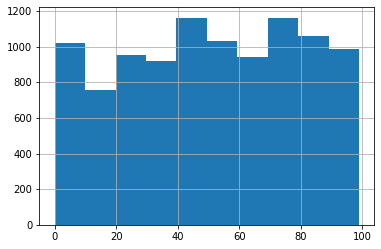

In [225]:
df_predict_class = df_predict_result.idxmax(axis=1)
df_predict_class.hist()

In [226]:
df_predict_class.to_csv(root_path + 'result-6.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
